https://towardsdatascience.com/implementing-macd-in-python-cc9b2280126a

In [1]:
import yfinance as yf
import chart_studio.plotly as py 
import cufflinks as cf
import datetime as dt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import pandas_datareader.data as web


from plotly import subplots 
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, plot,iplot


cf.go_offline()

import chart_studio
chart_studio.tools.set_credentials_file(username='Anuj8826', api_key='WyzvlYB6EYkp1sZ3ki2K')

def save_nse_bank_tickers():
    list_of_stock_codes = list(pd.read_csv('nifty_list/niftybanklist.csv')['Symbol'])
    return list_of_stock_codes

def save_nse_pharma_tickers():
    list_of_stock_codes = list(pd.read_csv('nifty_list/niftypharmalist.csv')['Symbol'])
    return list_of_stock_codes

def save_nse_nifty_tickers():
    list_of_stock_codes = list(pd.read_csv('nifty_list/nifty50list.csv')['Symbol'])
    return list_of_stock_codes


def save_nse_500_tickers():
    list_of_stock_codes = list(pd.read_csv('nifty_list/ind_nifty500list.csv')['Symbol'])
    return list_of_stock_codes

def save_nse_200_tickers():
    list_of_stock_codes = list(pd.read_csv('nifty_list/ind_nifty200list.csv')['Symbol'])
    list_of_stock_codes.remove('ACC')
    return list_of_stock_codes

def save_nse_100_tickers():
    list_of_stock_codes = list(pd.read_csv('nifty_list/ind_nifty100list.csv')['Symbol'])
    return list_of_stock_codes

def save_nse_50_tickers():
    list_of_stock_codes = list(pd.read_csv('nifty_list/ind_nifty50list.csv')['Symbol'])
    return list_of_stock_codes

def fetch_invested_tickers():
    list_of_stock_codes = list(pd.read_csv('nifty_list/holdings.csv')['Instrument'])
    return list_of_stock_codes

nifty_50_list = fetch_invested_tickers()


nifty_50_list = [ticker+".NS" for ticker in nifty_50_list]

start = dt.datetime.today()- dt.timedelta(100)
end = dt.datetime.today()
stock_info_df = yf.download(nifty_50_list, start, end)

adj_close_df = stock_info_df['Adj Close']
adj_close_df

adj_close_df2 = adj_close_df

for stock_index in adj_close_df.columns:

    adj_close_df[stock_index + "_MA_Fast"] = adj_close_df[stock_index].ewm(span=12, min_periods=12).mean()
    
    adj_close_df[stock_index + "_MA_Slow"] = adj_close_df[stock_index].ewm(span=26, min_periods=26).mean()
    
    adj_close_df[stock_index + "_MACD"] =  adj_close_df[stock_index + "_MA_Fast"] - adj_close_df[stock_index + "_MA_Slow"]
    
    adj_close_df[stock_index + "_Signal"] = adj_close_df[stock_index + "_MACD"].ewm(span=9, min_periods=9).mean()
    
    adj_close_df[stock_index + '_SMA_10'] = adj_close_df[stock_index].rolling(window=10).mean()


new_df = adj_close_df[adj_close_df.columns.sort_values()].dropna()
new_df.iplot(theme='white', filename='MACD_NIFTY50)', world_readable=True)
# Create the plot matrix:
fig = subplots.make_subplots(rows=50, cols=1)

for sector_ticker_name in nifty_50_list:
    try:
        trace = new_df[[sector_ticker_name +'_MACD', sector_ticker_name +'_Signal']].iplot(kind='scatter',colorscale="Reds")
        fig.add_traces(trace)
    except:
        continue

fig['layout'].update(height=600, width=600, title='PARTICLES CORRELATION')
# py.plot(fig, auto_open=True, filename="example.html")

[*********************100%%**********************]  29 of 29 completed


1 Failed download:
['HDFC.NS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-09-14 15:33:21.754373 -> 2023-12-23 15:33:21.754400)')


/var/folders/k2/g38yt6jx3h78hcx0b82sclmw0000gn/T/ipykernel_27560/3096730380.py:73: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/k2/g38yt6jx3h78hcx0b82sclmw0000gn/T/ipykernel_27560/3096730380.py:75: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/k2/g38yt6jx3h78hcx0b82sclmw0000gn/T/ipykernel_27560/3096730380.py:77: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd

Layout({
    'height': 600,
    'template': '...',
    'title': {'text': 'PARTICLES CORRELATION'},
    'width': 600,
    'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
    'xaxis10': {'anchor': 'y10', 'domain': [0.0, 1.0]},
    'xaxis11': {'anchor': 'y11', 'domain': [0.0, 1.0]},
    'xaxis12': {'anchor': 'y12', 'domain': [0.0, 1.0]},
    'xaxis13': {'anchor': 'y13', 'domain': [0.0, 1.0]},
    'xaxis14': {'anchor': 'y14', 'domain': [0.0, 1.0]},
    'xaxis15': {'anchor': 'y15', 'domain': [0.0, 1.0]},
    'xaxis16': {'anchor': 'y16', 'domain': [0.0, 1.0]},
    'xaxis17': {'anchor': 'y17', 'domain': [0.0, 1.0]},
    'xaxis18': {'anchor': 'y18', 'domain': [0.0, 1.0]},
    'xaxis19': {'anchor': 'y19', 'domain': [0.0, 1.0]},
    'xaxis2': {'anchor': 'y2', 'domain': [0.0, 1.0]},
    'xaxis20': {'anchor': 'y20', 'domain': [0.0, 1.0]},
    'xaxis21': {'anchor': 'y21', 'domain': [0.0, 1.0]},
    'xaxis22': {'anchor': 'y22', 'domain': [0.0, 1.0]},
    'xaxis23': {'anchor': 'y23', 'domain': [0.0, 

[*********************100%%**********************]  1 of 1 completed


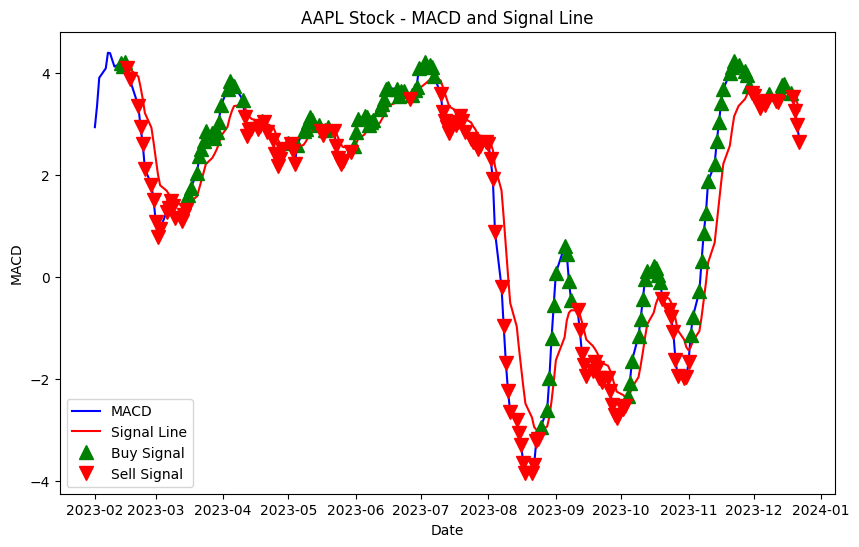

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt

# Fetch historical data
start = dt.datetime.today() - dt.timedelta(365)  # 1 year ago
end = dt.datetime.today()
stock_symbol = "AAPL"  # Replace with the stock symbol of your choice
stock_data = yf.download(stock_symbol, start, end)

# Calculate MACD and Signal Line
stock_data['MA_Fast'] = stock_data['Adj Close'].ewm(span=12, min_periods=12).mean()
stock_data['MA_Slow'] = stock_data['Adj Close'].ewm(span=26, min_periods=26).mean()
stock_data['MACD'] = stock_data['MA_Fast'] - stock_data['MA_Slow']
stock_data['Signal'] = stock_data['MACD'].ewm(span=9, min_periods=9).mean()

# Plotting MACD and Signal Line
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['MACD'], label='MACD', color='blue')
plt.plot(stock_data.index, stock_data['Signal'], label='Signal Line', color='red')

# Plot Buy signals (when MACD crosses above Signal)
plt.plot(stock_data[stock_data['MACD'] > stock_data['Signal']].index,
         stock_data['MACD'][stock_data['MACD'] > stock_data['Signal']],
         '^', markersize=10, color='g', label='Buy Signal')

# Plot Sell signals (when MACD crosses below Signal)
plt.plot(stock_data[stock_data['MACD'] < stock_data['Signal']].index,
         stock_data['MACD'][stock_data['MACD'] < stock_data['Signal']],
         'v', markersize=10, color='r', label='Sell Signal')

plt.title(f'{stock_symbol} Stock - MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()


In [10]:
import plotly.graph_objects as go
import pandas as pd
import yfinance as yf
import datetime as dt

# Fetching stock data (adjust the list of tickers as needed)
nifty_50_list = ['AAPL', 'GOOGL', 'MSFT']  # Replace with your own list of tickers
start = dt.datetime.today() - dt.timedelta(100)
end = dt.datetime.today()
stock_info_df = yf.download(nifty_50_list, start, end)['Adj Close']

# Calculate MACD
def calculate_macd(data, fast_period=12, slow_period=26, signal_period=9):
    ma_fast = data.ewm(span=fast_period, min_periods=fast_period).mean()
    ma_slow = data.ewm(span=slow_period, min_periods=slow_period).mean()
    macd = ma_fast - ma_slow
    signal = macd.ewm(span=signal_period, min_periods=signal_period).mean()
    histogram = macd - signal
    return macd, signal, histogram

# Calculate MACD for each stock
macd_dict = {}
signal_dict = {}
histogram_dict = {}

for stock_index in stock_info_df.columns:
    macd, signal, histogram = calculate_macd(stock_info_df[stock_index])
    macd_dict[stock_index] = macd
    signal_dict[stock_index] = signal
    histogram_dict[stock_index] = histogram

# Plot MACD and MACD Histogram
fig = go.Figure()

for stock_index in stock_info_df.columns:
    # Plot MACD
    fig.add_trace(go.Scatter(x=stock_info_df.index, y=macd_dict[stock_index], mode='lines', name=f'{stock_index} MACD'))
    # Plot Signal Line
    fig.add_trace(go.Scatter(x=stock_info_df.index, y=signal_dict[stock_index], mode='lines', name=f'{stock_index} Signal'))
    # Plot MACD Histogram
    fig.add_trace(go.Bar(x=stock_info_df.index, y=histogram_dict[stock_index], name=f'{stock_index} MACD Histogram'))

# Update layout
fig.update_layout(
    title='MACD and MACD Histogram',
    xaxis_title='Date',
    yaxis_title='Value',
    legend=dict(x=0, y=1, traceorder='normal', orientation='h'),
)

# Show the plot
fig.show()


[*********************100%%**********************]  3 of 3 completed
